### Script to analyze CourtListener dockets

In [39]:
# Importing required libraries
import os
import pandas as pd
import dask.dataframe as dd
import timeit
import glob
from datetime import datetime
import pyarrow.parquet as pq
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Setting the data directory: get the current directory and then go up two levels to get to the data directory
# This is the directory where the dockets csv files are stored; print it out to make sure it is correct
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
grandparent_dir = os.path.dirname(parent_dir)
data_dir = os.path.join(grandparent_dir, 'data')
dockets_csv_path = os.path.join(data_dir, 'dockets/csv')
print(dockets_csv_path)

/Users/eshan23/eshanprashar_git_profile/judges-conflicts/data/dockets/csv


In [3]:
# Creating pandas dataframe using the csv files
# We will try two methods to achieve this: one, using the load_data function I've used in other notebooks and two, using dask
# Defining load_data function

def load_data(data_dir):
    '''
    Base approach to load data from csv files in a directory
    '''
    all_files = glob.glob(data_dir + "/*.csv")
    print(f"Found {len(all_files)} files in the directory")

    # Measure time using timeit
    start_time = timeit.default_timer()

    li = []
    for filename in all_files:
        try:
            df = pd.read_csv(filename, index_col=None, header=0)
            li.append(df)
        except Exception as e:
            print(f"Error reading file {filename}: {e}")

    elapsed_time = timeit.default_timer() - start_time
    print(f"Time taken to load {len(all_files)} files using base approach: {elapsed_time:.2f} seconds")
    return pd.concat(li, axis=0, ignore_index=True)

# Loading data using dask
def load_data_with_dask(data_dir):
    '''
    This function reads multiple CSV files using Dask for efficient memory usage
    and parallel processing.
    '''
    all_files = glob.glob(data_dir + "/*.csv")
    print(f"Found {len(all_files)} files in the directory")

    # Measure time using timeit
    start_time = timeit.default_timer()

    # Use Dask to read all CSV files in parallel, setting all columns as 'object'
    df = dd.read_csv(all_files, dtype=str, assume_missing=True)

    # Convert Dask DataFrame to Pandas DataFrame if needed
    df = df.compute()

    elapsed_time = timeit.default_timer() - start_time
    print(f"Time taken to load data with Dask: {elapsed_time:.2f} seconds")
    
    return df

In [4]:
# Load data using the two methods
# Using the first method: load data function
dockets_df = load_data(dockets_csv_path)

Found 344 files in the directory


/var/folders/54/mhs5zkcs6zb1_y58hd7pczjc0000gn/T/ipykernel_23171/2953995665.py:18: DtypeWarning: Columns (17,29,45) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename, index_col=None, header=0)
/var/folders/54/mhs5zkcs6zb1_y58hd7pczjc0000gn/T/ipykernel_23171/2953995665.py:18: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename, index_col=None, header=0)
/var/folders/54/mhs5zkcs6zb1_y58hd7pczjc0000gn/T/ipykernel_23171/2953995665.py:18: DtypeWarning: Columns (17,45) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename, index_col=None, header=0)
/var/folders/54/mhs5zkcs6zb1_y58hd7pczjc0000gn/T/ipykernel_23171/2953995665.py:18: DtypeWarning: Columns (29,45) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename, index_col=None, header=0)
/var/folders/54/mhs5zkcs6zb1_y58

Error reading file /Users/eshan23/eshanprashar_git_profile/judges-conflicts/data/dockets/csv/dockets_200101-205101.csv: No columns to parse from file


/var/folders/54/mhs5zkcs6zb1_y58hd7pczjc0000gn/T/ipykernel_23171/2953995665.py:18: DtypeWarning: Columns (17,29,45) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename, index_col=None, header=0)
/var/folders/54/mhs5zkcs6zb1_y58hd7pczjc0000gn/T/ipykernel_23171/2953995665.py:18: DtypeWarning: Columns (17,45) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename, index_col=None, header=0)
/var/folders/54/mhs5zkcs6zb1_y58hd7pczjc0000gn/T/ipykernel_23171/2953995665.py:18: DtypeWarning: Columns (17,45) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename, index_col=None, header=0)
/var/folders/54/mhs5zkcs6zb1_y58hd7pczjc0000gn/T/ipykernel_23171/2953995665.py:18: DtypeWarning: Columns (45) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename, index_col=None, header=0)
/var/folders/54/mhs5zkcs6zb1_y58

Time taken to load 344 files using base approach: 17.53 seconds


In [5]:
# Using the second method: load data with dask
dockets_df_dask = load_data_with_dask(dockets_csv_path)

Found 344 files in the directory
Time taken to load data with Dask: 22.69 seconds


**Dask seems to have taken ~1.8 times the amount of time** - maybe it gets better with scale! For now, we can work with the _dockets dataframe_

In [6]:
# Examining the dataframe
dockets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2511080 entries, 0 to 2511079
Data columns (total 57 columns):
 #   Column                              Dtype  
---  ------                              -----  
 0   resource_uri                        object 
 1   id                                  int64  
 2   court                               object 
 3   court_id                            object 
 4   original_court_info                 object 
 5   idb_data                            float64
 6   clusters                            object 
 7   audio_files                         object 
 8   assigned_to                         object 
 9   referred_to                         object 
 10  absolute_url                        object 
 11  date_created                        object 
 12  date_modified                       object 
 13  source                              int64  
 14  appeal_from_str                     object 
 15  assigned_to_str                     object 
 16  

In [ ]:
# Upload the data to a parquet file
dockets_df.to_parquet(os.path.join(data_dir, 'dockets/intermediate_dfs', 'all_dockets.parquet'))

In [15]:
# Examine the data
dockets_df.head()

,resource_uri,id,court,court_id,original_court_info,idb_data,clusters,audio_files,assigned_to,referred_to,...,filepath_ia_json,ia_upload_failure_count,ia_needs_upload,ia_date_first_change,date_blocked,blocked,appeal_from,parent_docket,tags,panel
0,https://www.courtlistener.com/api/rest/v4/dock...,68696328,https://www.courtlistener.com/api/rest/v4/cour...,txwd,NaN,NaN,[],[],NaN,NaN,...,NaN,NaN,True,2024-05-28T10:54:28.356573-07:00,NaN,False,NaN,NaN,[],[]
1,https://www.courtlistener.com/api/rest/v4/dock...,68696327,https://www.courtlistener.com/api/rest/v4/cour...,alnd,NaN,NaN,[],[],NaN,NaN,...,NaN,NaN,True,2024-05-28T10:54:27.712589-07:00,NaN,False,NaN,NaN,[],[]
2,https://www.courtlistener.com/api/rest/v4/dock...,68696326,https://www.courtlistener.com/api/rest/v4/cour...,tnmd,NaN,NaN,[],[],NaN,NaN,...,NaN,NaN,True,2024-05-28T10:54:27.028271-07:00,NaN,False,NaN,NaN,[],[]
3,https://www.courtlistener.com/api/rest/v4/dock...,68696325,https://www.courtlistener.com/api/rest/v4/cour...,miwd,NaN,NaN,[],[],https://www.courtlistener.com/api/rest/v4/peop...,NaN,...,NaN,NaN,True,2024-05-28T10:54:25.254612-07:00,NaN,False,NaN,NaN,[],[]
4,https://www.courtlistener.com/api/rest/v4/dock...,68696324,https://www.courtlistener.com/api/rest/v4/cour...,nmd,NaN,NaN,[],[],NaN,NaN,...,NaN,NaN,True,2024-05-28T10:54:24.637996-07:00,NaN,False,NaN,NaN,[],[]


The plan is to segregate this dataset into **3 parts:**
1. Dockets where _assigned to_ is non-null
2. Dockets where _assigned to_ is null but _original court info_ is non-null (not super hopeful case)
3. Dockets where both the above fields are null

First, let's filter out the dataframe where _assigned to_ is non-null

In [18]:
# Print total docket rows
print(f"Total docket rows: {dockets_df.shape[0]}")

# Now, check unique dockets in the data
unique_dockets = dockets_df['docket_number'].nunique()
print(f"Unique dockets in the data: {unique_dockets}")

# Check total docket rows and unique dockets with missing value for 'assigned_to_str'
dockets_without_judges = dockets_df[dockets_df['assigned_to_str'].isnull()]
unique_dockets_without_judges = dockets_without_judges['docket_number'].nunique()
print(f"Total docket rows with missing value for 'assigned_to_str': {dockets_without_judges.shape[0]}")
print(f"Unique dockets with missing value for 'assigned_to_str': {unique_dockets_without_judges}")


Total docket rows: 2511080
Unique dockets in the data: 777950
Total docket rows with missing value for 'assigned_to_str': 1431677
Unique dockets with missing value for 'assigned_to_str': 542034


In [12]:
# Check total docket rows and unique dockets where 'assigned_to_str' is not missing
dockets_with_judges = dockets_df[dockets_df['assigned_to_str'].notnull()]
unique_dockets_with_judges = dockets_with_judges['docket_number'].nunique()
print(f"Total docket rows with 'assigned_to_str' not missing: {dockets_with_judges.shape[0]}")
print(f"Unique dockets with 'assigned_to_str' not missing: {unique_dockets_with_judges}")

Total docket rows with 'assigned_to_str' not missing: 1079403
Unique dockets with 'assigned_to_str' not missing: 351434


In [57]:
# docket numbers that are common in both sets
common_dockets = set(dockets_with_judges['docket_number']).intersection(set(dockets_without_judges['docket_number']))
print(f"Common dockets in both sets: {len(common_dockets)}")



Common dockets in both sets: 115518


In [17]:
# Export random sample of 1000 dockets with judge names to a csv file
dockets_with_judges.sample(1000).to_csv('dockets_with_judges_sample.csv', index=False)

In [25]:
# Examining the difference between dockets_without_judges and dockets_with_judges along 3 columns: court_id, source and year from date_filed
# Create histograms for each dataset with each of the three columns along the X-axis

# Convert the date_filed column to datetime format and extract the year
for df in [dockets_without_judges, dockets_with_judges]:
    df['year_filed'] = pd.to_datetime(df['date_filed'], format='mixed').dt.year

/var/folders/54/mhs5zkcs6zb1_y58hd7pczjc0000gn/T/ipykernel_23171/1916603588.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year_filed'] = pd.to_datetime(df['date_filed'], format='mixed').dt.year
/var/folders/54/mhs5zkcs6zb1_y58hd7pczjc0000gn/T/ipykernel_23171/1916603588.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year_filed'] = pd.to_datetime(df['date_filed'], format='mixed').dt.year


In [47]:
largest_unique_counts_by_court = dockets_without_judges.groupby('court_id')['docket_number'].nunique()
largest_unique_counts_by_court = largest_unique_counts_by_court.sort_values(ascending=False).head(10)
largest_unique_counts_by_court

court_id
txsd    58253
azd     38023
txwd    36518
ilnb    25823
ca6     22090
njd     21533
cacd    20007
casd    16425
caeb    12823
vaed    11200
Name: docket_number, dtype: int64

In [49]:
largest_counts_by_court = dockets_without_judges.groupby('court_id')['docket_number'].count()
largest_counts_by_court = largest_counts_by_court.sort_values(ascending=False).head(10)
largest_counts_by_court

court_id
txsd      81150
azd       63300
texapp    60677
txwd      58969
vaed      40436
ilnb      36049
cacd      29465
casd      25886
ca6       23870
njd       23162
Name: docket_number, dtype: int64

In [54]:
# Function to plot histograms stacked vertically with two bars for each X-axis value
def plot_histograms_with_unique_counts(df, df_name):
    plt.figure(figsize=(10, 12))  # Adjust the figure size to make the plots larger

    # 1. Plot histogram for court_id
    plt.subplot(3, 1, 1)
    original_counts_by_court = df['court_id'].value_counts().nlargest(20)
    unique_counts_by_court = df.groupby('court_id')['docket_number'].nunique().nlargest(20)

    x_court = np.arange(len(original_counts_by_court.index))
    width = 0.35  # Width of the bars

    plt.bar(x_court - width/2, original_counts_by_court, width=width, label='Total Count', color='skyblue')
    plt.bar(x_court + width/2, unique_counts_by_court, width=width, label='Unique Count', color='navy')

    plt.xticks(x_court, original_counts_by_court.index, rotation=90)
    plt.title(f'{df_name}: Docket Count by Court ID')
    plt.xlabel('Court ID')
    plt.ylabel('Count of Docket Numbers')
    plt.legend()

    # 2. Plot histogram for source
    plt.subplot(3, 1, 2)
    original_counts_by_source = df['source'].value_counts()
    unique_counts_by_source = df.groupby('source')['docket_number'].nunique()

    x_source = np.arange(len(original_counts_by_source.index))

    plt.bar(x_source - width/2, original_counts_by_source, width=width, label='Total Count', color='orange')
    plt.bar(x_source + width/2, unique_counts_by_source, width=width, label='Unique Count', color='darkred')

    plt.xticks(x_source, original_counts_by_source.index, rotation=90)
    plt.title(f'{df_name}: Docket Count by Source')
    plt.xlabel('Source')
    plt.ylabel('Count of Docket Numbers')
    plt.legend()

    # 3. Plot histogram for year
    plt.subplot(3, 1, 3)
    filtered_years = df['year_filed'].dropna().astype(int)
    filtered_years = filtered_years[filtered_years >= 1980]

    original_counts_by_year = filtered_years.value_counts().sort_index()
    unique_counts_by_year = df[df['year_filed'].isin(filtered_years)].groupby('year_filed')['docket_number'].nunique()

    x_year = np.arange(len(original_counts_by_year.index))

    plt.bar(x_year - width/2, original_counts_by_year, width=width, label='Total Count', color='green')
    plt.bar(x_year + width/2, unique_counts_by_year, width=width, label='Unique Count', color='orange')

    plt.xticks(x_year, original_counts_by_year.index, rotation=90)
    plt.title(f'{df_name}: Docket Count by Year Filed')
    plt.xlabel('Year')
    plt.ylabel('Count of Docket Numbers')
    plt.legend()

    plt.tight_layout()  # Adjust the layout so there is no overlap
    plt.show()

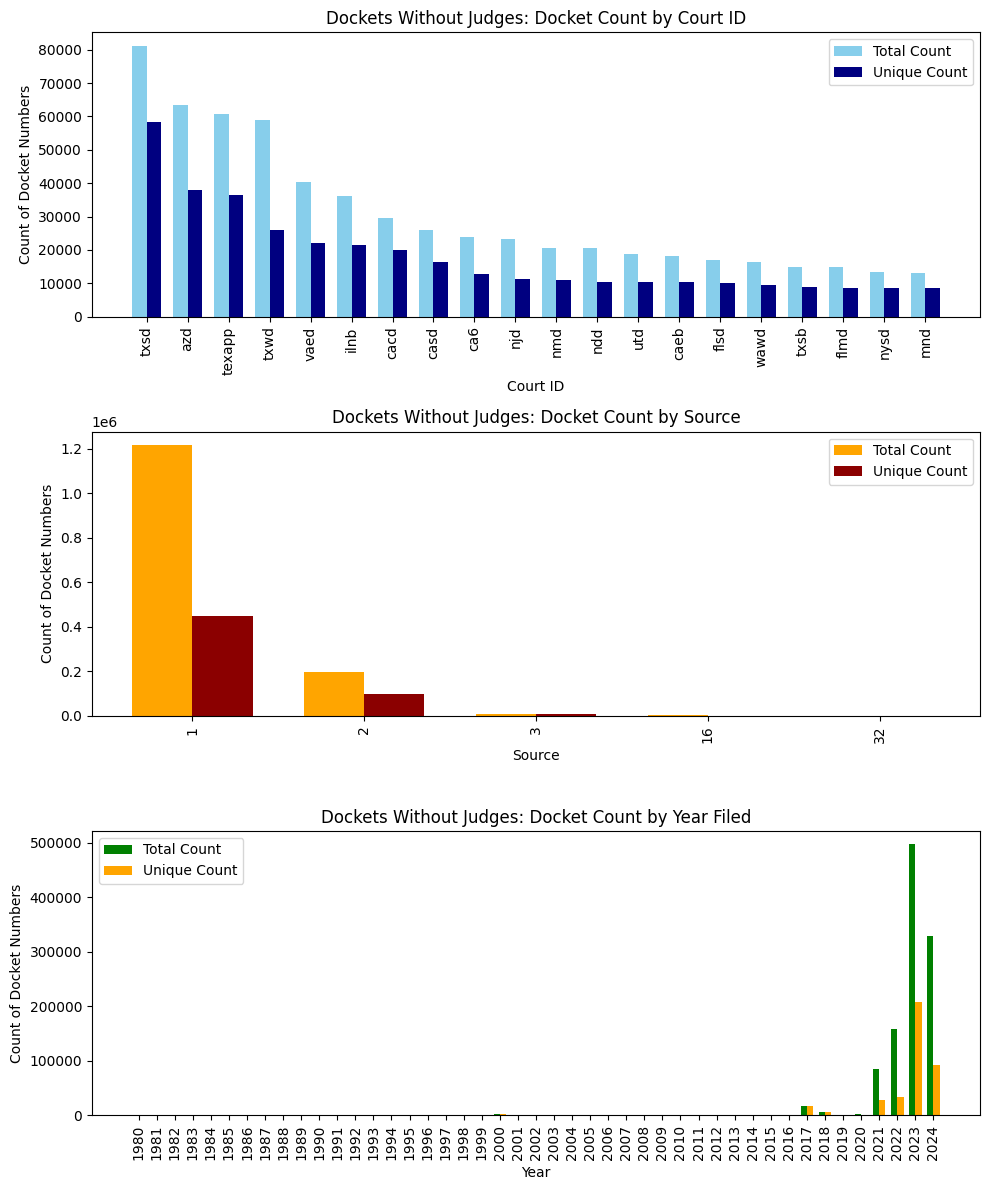

In [55]:
# Plot histograms for dockets_without_judges
plot_histograms_with_unique_counts(dockets_without_judges, 'Dockets Without Judges')

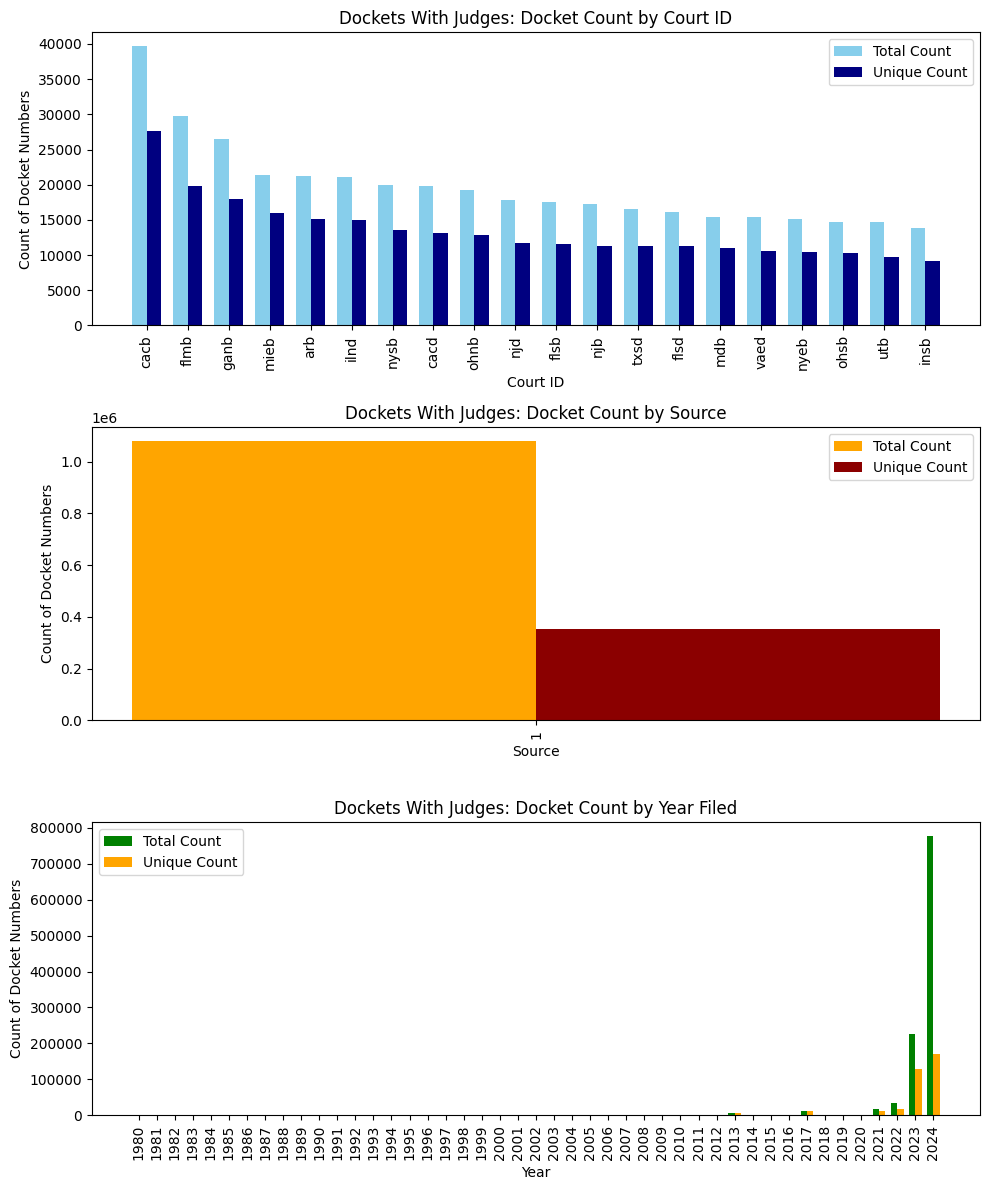

In [56]:
# Plot histograms for dockets_with_judges
plot_histograms_with_unique_counts(dockets_with_judges, 'Dockets With Judges')